**LOAD DATASET**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import boto3

In [3]:
# Configure the S3 client
s3 = boto3.client('s3')

In [4]:
s3 = boto3.resource(
    service_name='s3',
    region_name='ap-south-1',
    aws_access_key_id='',
    aws_secret_access_key=''
)

In [5]:
# Specify the S3 bucket and file path
bucket_name = 'zomato-dataset'
file_path = 's3://zomato-dataset/zomato.csv'

In [6]:
for obj in s3.Bucket(bucket_name).objects.all():
    print(obj)

s3.ObjectSummary(bucket_name='zomato-dataset', key='zomato.csv')


In [7]:
# Read the CSV file from S3 using the client
obj = s3.Bucket(bucket_name).Object('zomato.csv').get()
df = pd.read_csv(obj['Body'])

In [8]:
# Check the loaded DataFrame
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [119]:
# import pandas as pd
# df = pd.read_csv("data/zomato.csv")

In [9]:
df.shape

(51717, 17)

**Create a copy of dataframe of orginal dataframe**

In [10]:
df_copy = df.copy()

In [11]:
df_copy.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

**Columns description**

**url:** contains the url of the restaurant in the zomato website

**address:** contains the address of the restaurant in Bengaluru

**name:** contains the name of the restaurant

**online_order:** whether online ordering is available in the restaurant or not

**book_table:** table book option available or not

**rate:** contains the overall rating of the restaurant out of 5

**votes:** contains total number of rating for the restaurant as of the above mentioned date

**phone:** contains the phone number of the restaurant

**location:** contains the neighborhood in which the restaurant is located

**rest_type:** restaurant type

**dish_liked:** dishes people liked in the restaurant

**cuisines:** food styles, separated by comma

**approx_cost(for two people):** contains the approximate cost for meal for two people

**reviews_list:** list of tuples containing reviews for the restaurant, each tuple

**menu_item:** contains list of menus available in the restaurant

**listed_in(type):** type of meal

**listed_in(city):** contains the neighborhood in which the restaurant is listed




In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

**Observation**

**Rate, dish_liked, phone , approx_cost(for two people) values are missing.**

**Data Preprocess**

**Adjust column names and dropped irrelevant columns**

In [13]:
df_copy.loc[:,['address','location','listed_in(city)']].sample(8,random_state=1)

,address,location,listed_in(city)
8157,"2A/3, 15th Cross, Green Garden Layout, Shirdi ...",Marathahalli,Brookefield
32498,"18, Shreenidhi Arcade, Maruthi Nagar Main Road...",BTM,Koramangala 6th Block
4679,"56, Near Passport Office, Outer Ring Road, Bel...",Bellandur,Bellandur
2445,"14/6, 9th Main Road, Opposite Water Tank, 100 ...",BTM,Bannerghatta Road
27316,"321/3A, Sharif Complex, Hosur Main Road, Oppos...",Hosur Road,Koramangala 4th Block
2735,"4/5, 5th Cross, Laxmi Road, Shanti Nagar, Bang...",Shanti Nagar,Basavanagudi
34577,"9, Maruthi Nagar, Madiwala, BTM, Bangalore",BTM,Koramangala 6th Block
32233,"13th cross, 16th main, Tavarekere Main Road, B...",BTM,Koramangala 6th Block


**There is columns with redundant information. we wanted to keep the "location" column and drop the "address" and "listed_in(city)" columns**.

**Additionally, we are not interested in the "url" and "phone" columns, so we will drop those as well.**




In [14]:
# drop unnecessary columns
column_to_drop = ['address','url' ,'listed_in(city)', 'phone']

In [15]:
df_copy.drop(columns=column_to_drop, axis=1,inplace=True)

In [16]:
df_copy.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)'],
      dtype='object')

**Remove Duplicates**

**Checking how many duplicates values are in the dataset and drooping**

In [17]:
# check for duplicate values
print("No of Duplicates are: ",df_copy.duplicated().sum())

No of Duplicates are:  9809


In [18]:
# drop the duplicates
df_copy.drop_duplicates(inplace=True)

In [19]:
df_copy.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            4252
votes                              0
location                          14
rest_type                        172
dish_liked                     20206
cuisines                          36
approx_cost(for two people)      253
reviews_list                       0
menu_item                          0
listed_in(type)                    0
dtype: int64

**Removing Null values**

In [20]:
# check for null values percentage
((df_copy.isna().sum()/df_copy.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           10.15
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

**Observation:**

**We can oberve that 48.22% dish_liked is missing as well as 10.15% rate values are missing.**

**Before remove null values lets unterstand Rate columns data**

In [21]:
df_copy.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

**Observation:**

**There are some points which has 'NEW' rating and '-' rating, which is completely incorrect.**

In [22]:
# removed 'NEW' and '-' from rate coloumn and put NaN value.
import numpy as np
df_copy['rate'] = df_copy['rate'].replace('NEW', np.NaN)
df_copy['rate'] = df_copy['rate'].replace('-', np.NaN)

In [23]:
# chcek again data.rate coloumn. we can see nan values.
df_copy.rate.unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

We can see that by default it has '/5' (divide by 5) arithmatic character, first we will remove this then proceed.

In [24]:
# check for null values percentage
((df_copy.isna().sum()/df_copy.shape[0])*100).round(2)


name                            0.00
online_order                    0.00
book_table                      0.00
rate                           14.11
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

Note : 'rate' NaN % was 10.15 initially now it is 14.11. Because some values took 'NEW' and '-' values which we removed and this is actual NaN % for rate coloumn.

**Apply takes a function and applies it to all values of pandas series.**

In [25]:
df_copy['rate'] = df_copy['rate'].astype(str)

In [26]:
## removed all '/5' and replace with ''
df_copy['rate'] = df_copy['rate'].str.replace('/5', '')

In [27]:
## convert rate to float
df_copy['rate'] = df_copy['rate'].astype(float)

In [28]:
df_copy.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [29]:
df_copy['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

**Filtering rating from review list**

In [30]:
df_copy['reviews_list']

0        [('Rated 4.0', 'RATED\n  A beautiful place to ...
1        [('Rated 4.0', 'RATED\n  Had been here for din...
2        [('Rated 3.0', "RATED\n  Ambience is not that ...
3        [('Rated 4.0', "RATED\n  Great food and proper...
4        [('Rated 4.0', 'RATED\n  Very good restaurant ...
                               ...                        
51712    [('Rated 5.0', "RATED\n  Food and service are ...
51713                                                   []
51714                                                   []
51715    [('Rated 4.0', 'RATED\n  Nice and friendly pla...
51716    [('Rated 5.0', 'RATED\n  Great ambience , look...
Name: reviews_list, Length: 41908, dtype: object

In [31]:
type(df_copy.reviews_list[0])

str

In [32]:
# return to a list of tuples
import ast
df_copy.reviews_list = df_copy.reviews_list.apply(lambda x: ast.literal_eval(x))
type(df_copy.reviews_list[0])

list

In [33]:
# check for the first item in list
df_copy['reviews_list'][0]

[('Rated 4.0',
  'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.'),
 ('Rated 4.0',
  'RATED\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\nCheers'),
 ('Rated 2.0',
  'RATED\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this place is mos

**Observation:**

**We can see that in "Review_List" starting line come up with rating. 'Rated 4.0'.**

**We can use this values and filled up 'Rate' NaN index.**

In [34]:
# extract the rate for the first input from the review column
import re

ratings = []
for review in df_copy['reviews_list'][0]:
    match = re.search(r"Rated (\d\.\d)", review[0])
    if match:
        rating = float(match.group(1))
        ratings.append(rating)

print(ratings)


[4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0]


In [35]:
import re
import pandas as pd

# Create a new column to store the ratings
df_copy['ratings_list'] = ''

# Iterate over each row in the 'reviews_list' column
for index, row in df_copy.iterrows():
    ratings = []
    for review in row['reviews_list']:
        match = re.search(r"Rated (\d\.\d)", str(review))
        if match:
            rating = float(match.group(1))
            ratings.append(rating)
    df_copy.at[index, 'ratings_list'] = ratings

# Calculate the mean for each row and store it in a new column
df_copy['mean_rating'] = df_copy['ratings_list'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else None)



In [36]:
df_copy.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),ratings_list,mean_rating
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,"[4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, ...",4.083333
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,"[4.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, 2.0, 4.0, ...",3.571429


In [37]:
df_copy[['ratings_list', 'mean_rating']].head(5)

,ratings_list,mean_rating
0,"[4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, ...",4.083333
1,"[4.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, 2.0, 4.0, ...",3.571429
2,"[3.0, 3.0, 4.0, 3.0, 3.0, 1.0, 3.0, 1.0, 4.0, ...",3.150000
3,"[4.0, 2.0, 4.0, 2.0, 4.0, 5.0, 4.0, 5.0, 3.5, ...",3.671429
4,"[4.0, 4.0]",4.000000


In [38]:
df_copy['rate'].describe().round(1)

count    35994.0
mean         3.7
std          0.4
min          1.8
25%          3.4
50%          3.8
75%          4.0
max          4.9
Name: rate, dtype: float64

In [39]:
df_copy['mean_rating'].describe().round(1)

count    37463.0
mean         3.6
std          0.9
min          1.0
25%          3.1
50%          3.8
75%          4.2
max          5.0
Name: mean_rating, dtype: float64

**Calculates the mean value of the 'rate' column and replacing with NaN values**

In [40]:
df_copy['rate'].fillna(df_copy['rate'].mean(), inplace=True)


In [41]:
df_copy[['rate', 'mean_rating']].isna().sum()

rate              0
mean_rating    4445
dtype: int64

In [42]:
# check for null values
((df_copy.isna().sum()/df_copy.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                            0.00
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
ratings_list                    0.00
mean_rating                    10.61
dtype: float64

In [43]:
df_copy['rate'].describe()

count    41908.000000
mean         3.724262
std          0.414676
min          1.800000
25%          3.500000
50%          3.724262
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [44]:
#Round the values in the 'rate' column to one decimal place
df_copy['rate'] = df_copy['rate'].round(1)

In [45]:
df_copy.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),ratings_list,mean_rating
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,"[4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, ...",4.083333
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,"[4.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, 2.0, 4.0, ...",3.571429


In [46]:
#Randomly sample 5 rows from the 'rate' and 'mean_rating' columns
df_copy[['rate', 'mean_rating']].sample(5)

,rate,mean_rating
2006,3.6,3.388889
36033,4.5,4.214286
45520,3.3,1.000000
4175,3.3,3.500000
49998,3.0,2.272222


In [47]:
df_copy['rate'][12278]

3.7

In [48]:
df_copy['ratings_list'][12278]

[5.0]

In [49]:
df_copy['reviews_list'][12278]

[('Rated 5.0',
  'RATED\n  Wonderful experience with this restaurant, I have ordered through call they delivered delicious an yummy food at my home, alfaham Chicken, Rumali Roti, chicken dum biryani.')]

After randomly sampling the data, we noticed a significant difference between the values in the "rate" column compared to the "ratings_list" and "mean_rating" columns.

To streamline the information, we have decided to retain only the "rate" column. Purpose behind filling missing values has being accomplished.So,remove the "ratings_list" and "mean_rating" columns.





In [50]:
# Drop the "ratings_list" and "mean_rating" columns from df_copy
df_copy = df_copy.drop(["ratings_list", "mean_rating"], axis=1)

In [51]:
df_copy.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet


In [52]:
# check for null values
((df_copy.isna().sum()/df_copy.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                            0.00
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

In [53]:
df_copy[['rest_type','location','cuisines','approx_cost(for two people)']].isna().sum()

rest_type                      172
location                        14
cuisines                        36
approx_cost(for two people)    253
dtype: int64

In [54]:
columns_to_drop_na = ['rest_type', 'location', 'cuisines', 'approx_cost(for two people)']
df_copy = df_copy.dropna(subset=columns_to_drop_na)

In [55]:
df_copy[['rest_type','location','cuisines','approx_cost(for two people)']].isnull().sum()

rest_type                      0
location                       0
cuisines                       0
approx_cost(for two people)    0
dtype: int64

In [56]:
# check for null values
((df_copy.isna().sum()/df_copy.shape[0])*100).round(2)

name                            0.0
online_order                    0.0
book_table                      0.0
rate                            0.0
votes                           0.0
location                        0.0
rest_type                       0.0
dish_liked                     48.1
cuisines                        0.0
approx_cost(for two people)     0.0
reviews_list                    0.0
menu_item                       0.0
listed_in(type)                 0.0
dtype: float64

In [57]:
df_copy.shape

(41482, 13)

In [58]:
df_copy[['reviews_list', 'menu_item']] = df_copy[['reviews_list', 'menu_item']].applymap(tuple)
df_copy.drop_duplicates()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"((Rated 4.0, RATED\n A beautiful place to din...","([, ])",Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"((Rated 4.0, RATED\n Had been here for dinner...","([, ])",Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"((Rated 3.0, RATED\n Ambience is not that goo...","([, ])",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"((Rated 4.0, RATED\n Great food and proper Ka...","([, ])",Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"((Rated 4.0, RATED\n Very good restaurant in ...","([, ])",Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,NaN,Continental,"1,500","((Rated 5.0, RATED\n Food and service are inc...","([, ])",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,Bar,NaN,Finger Food,600,(),"([, ])",Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.7,0,Whitefield,Bar,NaN,Finger Food,"2,000",(),"([, ])",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","((Rated 4.0, RATED\n Nice and friendly place ...","([, ])",Pubs and bars


In [59]:
df_copy.shape

(41482, 13)

In [60]:
df_copy.dropna(how='any',inplace=True)
df_copy.dropna(how='any',inplace=True)

In [61]:
df_copy.shape

(21528, 13)

In [62]:
len(df_copy)

21528

In [63]:
#df_copy.dropna(how='any',inplace=True)

In [64]:
df_copy.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"((Rated 4.0, RATED\n A beautiful place to din...","([, ])",Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"((Rated 4.0, RATED\n Had been here for dinner...","([, ])",Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"((Rated 3.0, RATED\n Ambience is not that goo...","([, ])",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"((Rated 4.0, RATED\n Great food and proper Ka...","([, ])",Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"((Rated 4.0, RATED\n Very good restaurant in ...","([, ])",Buffet


In [65]:
df_copy.rename(columns={'approx_cost(for two people)':'average cost for 2'},inplace=True)

### Analysing each column

In [66]:
df_copy.name.value_counts().head(10)

name
Onesta                    85
Empire Restaurant         69
KFC                       58
McDonald's                55
Domino's Pizza            55
Pizza Hut                 54
Smally's Resto Cafe       54
Faasos                    52
Burger King               49
Corner House Ice Cream    48
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 20 Count of Restaurants')

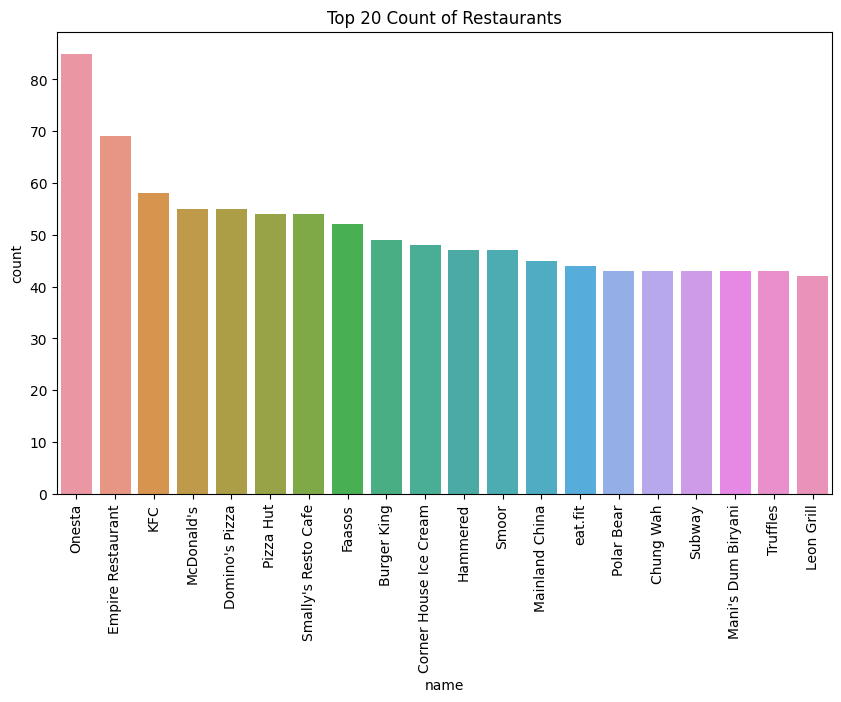

In [67]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='name', data=df_copy,order=df_copy['name'].value_counts().iloc[:20].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Top 20 Count of Restaurants')

##### Conclusion : - Onesta has maximum number of branches

In [68]:
df_copy.online_order.value_counts()

online_order
Yes    15279
No      6249
Name: count, dtype: int64

Text(0.5, 1.0, 'Restaurants accepting Online Orders')

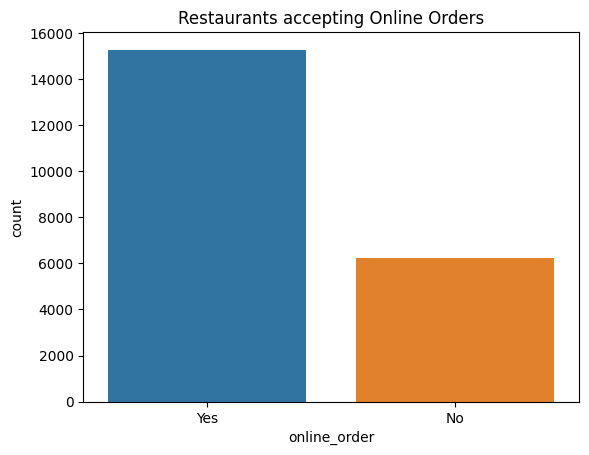

In [69]:
ax = sns.countplot(x='online_order',data=df_copy)
plt.title('Restaurants accepting Online Orders')

#### Conclusion : - Most of the restaurants accept Online Orders

Text(0.5, 1.0, 'Restaurants with Online Table booking Facility')

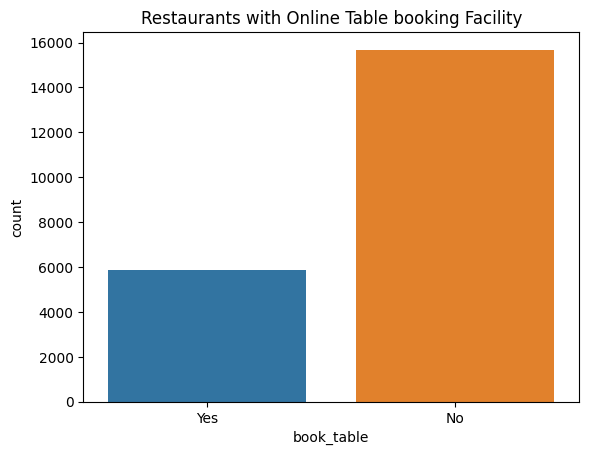

In [70]:
ax = sns.countplot(x='book_table',data=df_copy)
plt.title("Restaurants with Online Table booking Facility")

#### Conclusion : - Most of Restaurants don't have Online table booking facility

In [71]:
df_copy['location'].nunique()

88

Text(0.5, 1.0, 'Top 20 Locations with maximum Restaurants')

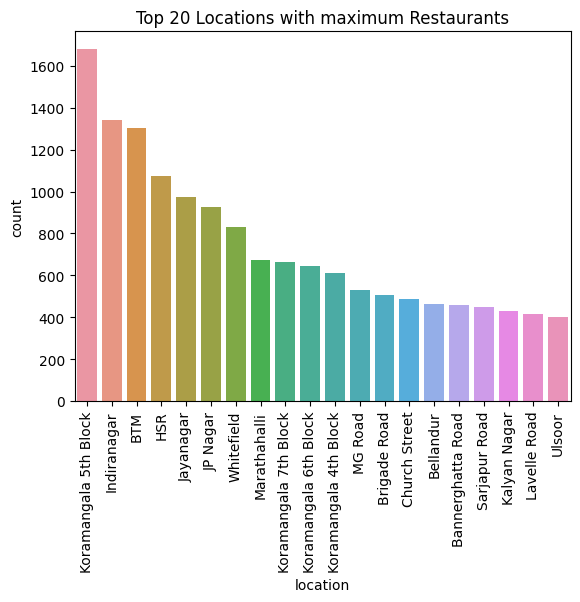

In [72]:
# There are total 88 unique locations so we only observe top 20
ax = sns.countplot(x='location',data=df_copy,order=df_copy['location'].value_counts().iloc[:20].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Top 20 Locations with maximum Restaurants')

#### Conclusion : - Maximum Resturants are located in Koramangala 5th block

In [73]:
df_copy['rest_type'].nunique()

73

In [74]:
df_copy['rest_type'].value_counts().head(20)

rest_type
Casual Dining                  6760
Quick Bites                    4781
Cafe                           2183
Dessert Parlor                  983
Casual Dining, Bar              953
Delivery                        662
Bar, Casual Dining              334
Takeaway, Delivery              328
Bar                             311
Pub                             301
Casual Dining, Cafe             291
Lounge                          278
Fine Dining                     272
Pub, Casual Dining              223
Food Court                      199
Bakery                          156
Cafe, Casual Dining             151
Dessert Parlor, Cafe            140
Microbrewery, Casual Dining     132
Casual Dining, Pub              124
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 20 Types of Restaurants')

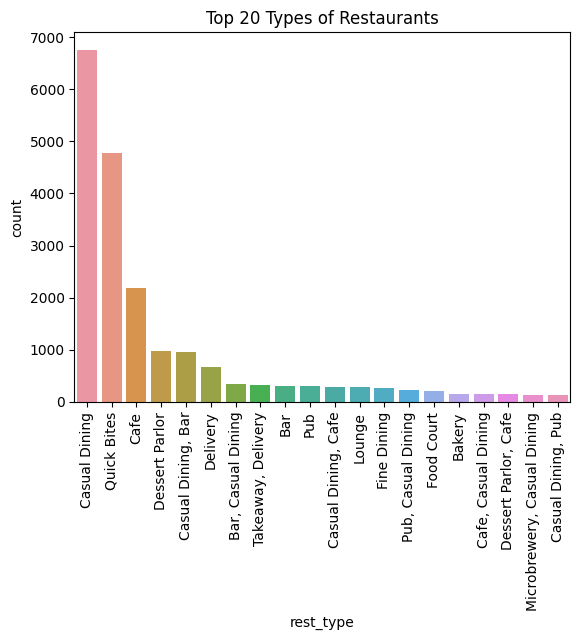

In [75]:
ax = sns.countplot(x='rest_type',data=df_copy,order=df_copy['rest_type'].value_counts().iloc[:20].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Top 20 Types of Restaurants')

#### Conclusion : - Maximum restaurants are Casual Dining Type followed by Quick Bites and cafe

In [76]:
df_copy['rest_type'].head()

0          Casual Dining
1          Casual Dining
2    Cafe, Casual Dining
3            Quick Bites
4          Casual Dining
Name: rest_type, dtype: object

In [77]:
df_copy['rest_type'] = df_copy['rest_type'].str.replace(",","")
df_copy['rest_type'] = df_copy['rest_type'].astype(str).apply(lambda x : ' '.join(sorted(x.split())))

In [78]:
df_copy['rest_type'].value_counts().head()

rest_type
Casual Dining        6760
Bites Quick          4781
Cafe                 2183
Bar Casual Dining    1287
Dessert Parlor        983
Name: count, dtype: int64

In [79]:
df_copy['cuisines'].head()

0    North Indian, Mughlai, Chinese
1       Chinese, North Indian, Thai
2            Cafe, Mexican, Italian
3        South Indian, North Indian
4          North Indian, Rajasthani
Name: cuisines, dtype: object

In [80]:
df_copy['cuisines'] = df_copy['cuisines'].str.replace(",","")
df_copy['cuisines'] = df_copy['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
df_copy['cuisines'].value_counts().head()

cuisines
Indian North                         1083
Chinese Indian North                  769
Chinese Indian Indian North South     402
Indian South                          341
Cream Desserts Ice                    311
Name: count, dtype: int64

In [81]:
df_copy['average cost for 2'].value_counts().head(20)

average cost for 2
400      2260
500      2117
600      1979
800      1557
300      1521
1,000    1149
700      1110
1,200     853
1,500     829
200       795
450       659
250       644
750       612
650       591
350       504
900       501
1,300     477
1,100     440
1,400     434
550       397
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 20 Restaurants with Average Cost for 2')

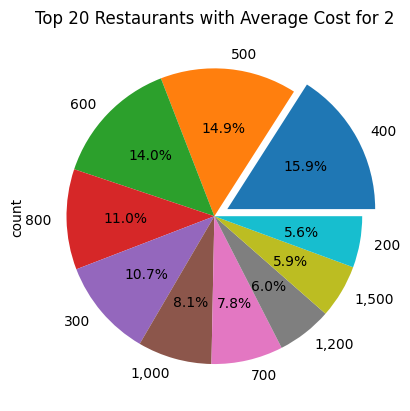

In [82]:
explode = (0.1,0,0,0,0,0,0,0,0,0)
ax = df_copy['average cost for 2'].value_counts().iloc[:10]
ax.plot(kind='pie',autopct='%1.1f%%',explode=explode)
plt.title('Top 20 Restaurants with Average Cost for 2')

In [83]:
df_copy.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average cost for 2,reviews_list,menu_item,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",Chinese Indian Mughlai North,800,"((Rated 4.0, RATED\n A beautiful place to din...","([, ])",Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",Chinese Indian North Thai,800,"((Rated 4.0, RATED\n Had been here for dinner...","([, ])",Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe Casual Dining,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",Cafe Italian Mexican,800,"((Rated 3.0, RATED\n Ambience is not that goo...","([, ])",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Bites Quick,Masala Dosa,Indian Indian North South,300,"((Rated 4.0, RATED\n Great food and proper Ka...","([, ])",Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe",Indian North Rajasthani,600,"((Rated 4.0, RATED\n Very good restaurant in ...","([, ])",Buffet


In [84]:
df_copy.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)'], inplace  =True)

In [85]:
df_copy.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average cost for 2
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Bites Quick,Indian Indian North South,300
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Indian North Rajasthani,600


In [86]:
df_copy['average cost for 2'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [87]:
#It appears that Average for 2 column has comma seperated values. We need to remove comma and convert it to float
df_copy['average cost for 2'] = df_copy['average cost for 2'].str.replace(",","")
df_copy['average cost for 2'] = df_copy['average cost for 2'].astype('float')

In [88]:
# We can export this clean file to perform model training
import os
#clean_file_path = os.path.join('notebooks','data','clean_data.csv')
df_copy.to_csv('data/clean_data.csv',index=False)

In [89]:
df_copy['online_order'] = pd.get_dummies(df_copy.online_order,drop_first=True).astype(int)
df_copy['book_table'] = pd.get_dummies(df_copy.book_table,drop_first=True).astype(int)
df_copy.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average cost for 2
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800.0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800.0
2,San Churro Cafe,1,0,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Bites Quick,Indian Indian North South,300.0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,Indian North Rajasthani,600.0


In [90]:
df_copy.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average cost for 2
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800.0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800.0
2,San Churro Cafe,1,0,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Bites Quick,Indian Indian North South,300.0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,Indian North Rajasthani,600.0


In [91]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21528 entries, 0 to 51715
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                21528 non-null  object 
 1   online_order        21528 non-null  int32  
 2   book_table          21528 non-null  int32  
 3   rate                21528 non-null  float64
 4   votes               21528 non-null  int64  
 5   location            21528 non-null  object 
 6   rest_type           21528 non-null  object 
 7   cuisines            21528 non-null  object 
 8   average cost for 2  21528 non-null  float64
dtypes: float64(2), int32(2), int64(1), object(4)
memory usage: 1.5+ MB


#### Encoding

In [92]:
# Since there are categorical Variables with no definite order or ranking we'll use LabelEncoder

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy['location'] = le.fit_transform(df_copy['location'])
df_copy['rest_type'] = le.fit_transform(df_copy['rest_type'])
df_copy['cuisines'] = le.fit_transform(df_copy['cuisines'])


In [94]:
df_copy.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average cost for 2
0,Jalsa,1,1,4.1,775,1,29,955,800.0
1,Spice Elephant,1,0,4.1,787,1,29,967,800.0
2,San Churro Cafe,1,0,3.8,918,1,22,810,800.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,19,1208,300.0
4,Grand Village,0,0,3.8,166,4,29,1245,600.0


In [95]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21528 entries, 0 to 51715
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                21528 non-null  object 
 1   online_order        21528 non-null  int32  
 2   book_table          21528 non-null  int32  
 3   rate                21528 non-null  float64
 4   votes               21528 non-null  int64  
 5   location            21528 non-null  int32  
 6   rest_type           21528 non-null  int32  
 7   cuisines            21528 non-null  int32  
 8   average cost for 2  21528 non-null  float64
dtypes: float64(2), int32(5), int64(1), object(1)
memory usage: 1.2+ MB


In [96]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21528 entries, 0 to 51715
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                21528 non-null  object 
 1   online_order        21528 non-null  int32  
 2   book_table          21528 non-null  int32  
 3   rate                21528 non-null  float64
 4   votes               21528 non-null  int64  
 5   location            21528 non-null  int32  
 6   rest_type           21528 non-null  int32  
 7   cuisines            21528 non-null  int32  
 8   average cost for 2  21528 non-null  float64
dtypes: float64(2), int32(5), int64(1), object(1)
memory usage: 1.2+ MB


#### Correlation

In [97]:
df_copy.drop(columns=['name'],inplace=True)

In [98]:
df_copy.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,average cost for 2
0,1,1,4.1,775,1,29,955,800.0
1,1,0,4.1,787,1,29,967,800.0
2,1,0,3.8,918,1,22,810,800.0
3,0,0,3.7,88,1,19,1208,300.0
4,0,0,3.8,166,4,29,1245,600.0


<Axes: >

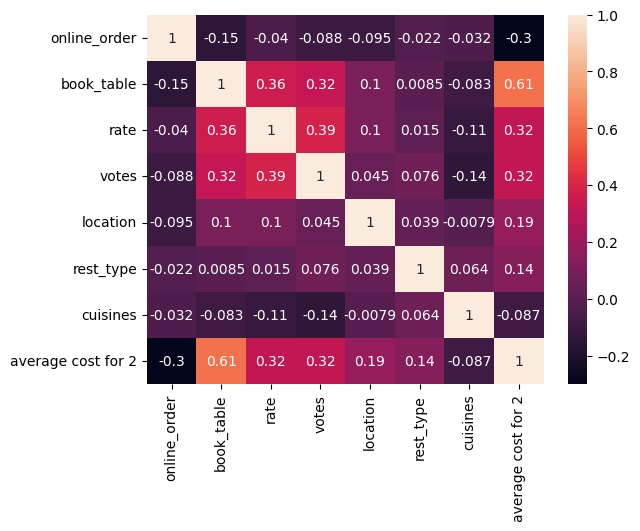

In [99]:
sns.heatmap(df_copy.corr(),annot=True)

In [100]:
X = df_copy.drop(columns=['rate']) #independent features
y = df_copy['rate'] #dependent or target feature

/n


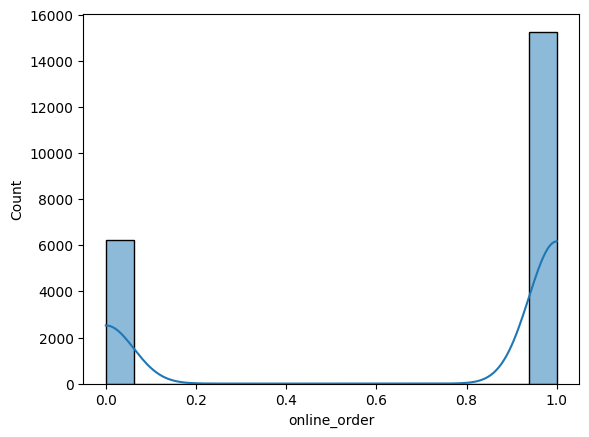

/n


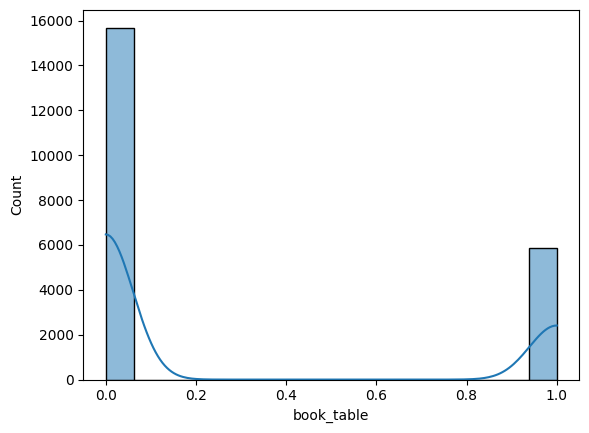

/n


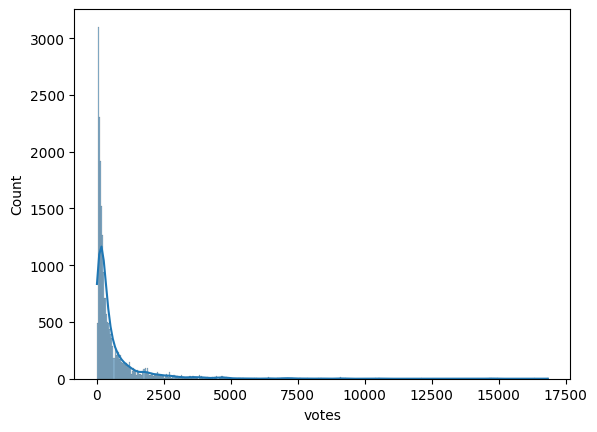

/n


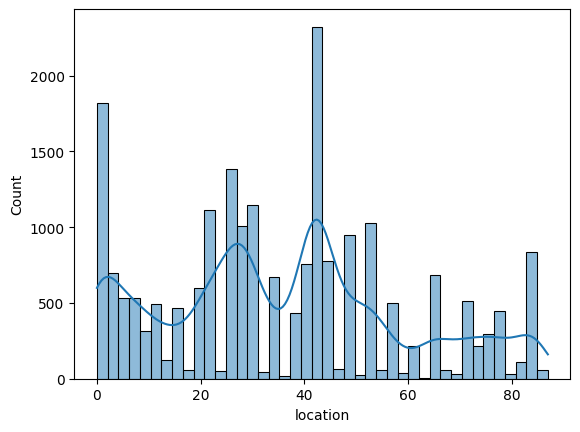

/n


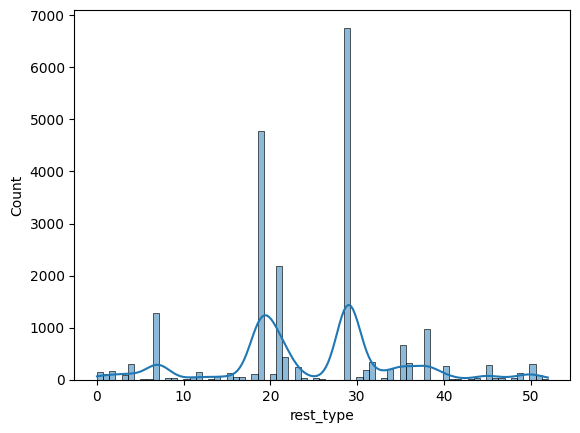

/n


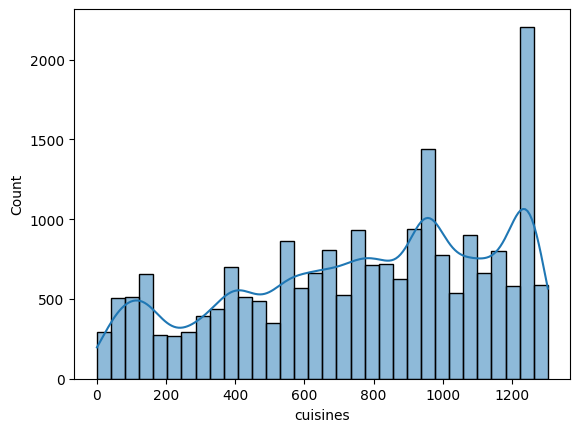

/n


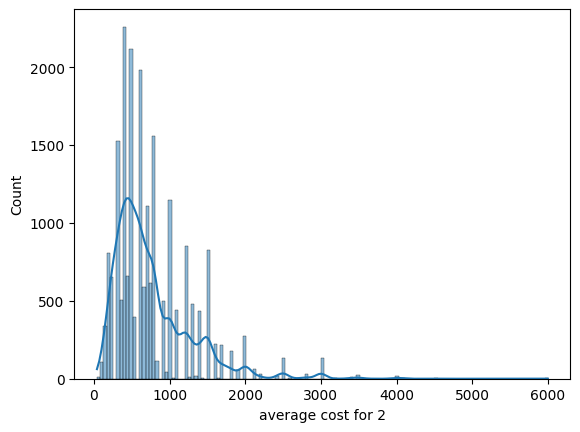

In [101]:
x = 0
for i in X:
    sns.histplot(data=df_copy,x=i,kde=True)
    print('/n')
    plt.show()

<Axes: xlabel='votes'>

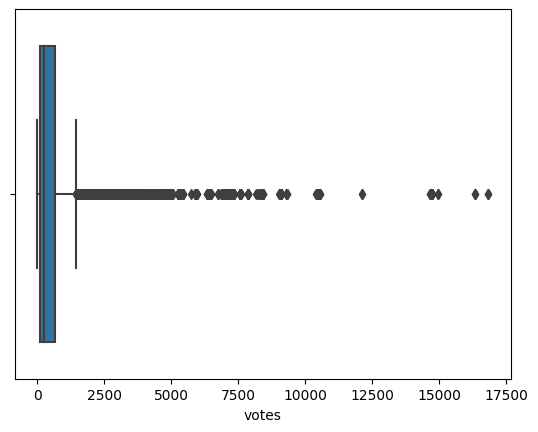

In [102]:
sns.boxplot(data=df_copy,x='votes')

In [103]:
#There are outliers in Votes so we need to use median to replace missing values

<Axes: xlabel='average cost for 2'>

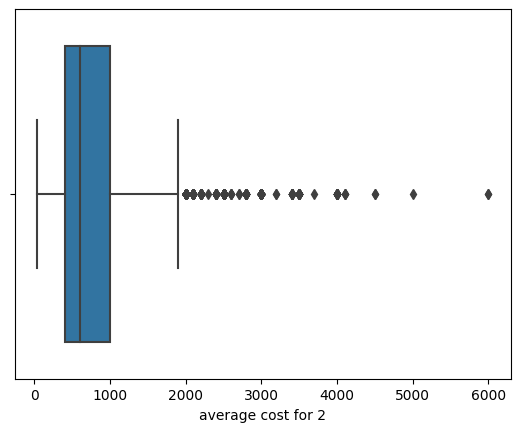

In [104]:
sns.boxplot(data=df_copy,x='average cost for 2')

In [105]:
#There are outliers in Average cost for 2 so we need to use median to replace missing values

In [106]:
df_copy.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,average cost for 2
0,1,1,4.1,775,1,29,955,800.0
1,1,0,4.1,787,1,29,967,800.0
2,1,0,3.8,918,1,22,810,800.0
3,0,0,3.7,88,1,19,1208,300.0
4,0,0,3.8,166,4,29,1245,600.0


In [107]:
X = df_copy.drop(columns=['rate'])
Y = df_copy['rate']

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,random_state=30)

In [109]:
X_train.shape

(19375, 7)

In [110]:
y_train.shape

(19375,)

In [111]:
X_test.shape

(2153, 7)

In [112]:
y_test.shape

(2153,)

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [120]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [115]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [116]:
regression.coef_

array([ 0.02092085,  0.08347511,  0.12305303,  0.02476171, -0.00982538,
       -0.01592246,  0.0477997 ])

In [117]:
regression.intercept_

3.915163870967742

In [118]:
import numpy as np
def evaluate(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [123]:
#Training of Different models
models = {
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'RandomForestRegressor': RandomForestRegressor()
}

mae_list = []
mse_list = []
rmse_list = []
trained_model_list = []
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    #Predictions on test data
    y_pred = model.predict(X_test)

    mae,mse,rmse,r2_square = evaluate(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print('MAE:- ', mae)
    print('MSE:- ', mse)
    print('RMSE:- ',rmse)
    print('R2_Score',r2_square*100)

    r2_list.append(r2_square)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)

    print("*"*40)
    print('\n')

LinearRegression
Model Training Performance
MAE:-  0.268926692364847
MSE:-  0.14732746912327535
RMSE:-  0.3838326056020715
R2_Score 20.821581454685923
****************************************


Lasso
Model Training Performance
MAE:-  0.30485693001513264
MSE:-  0.1862822299940983
RMSE:-  0.4316042515940944
R2_Score -0.1139330078737455
****************************************


Ridge
Model Training Performance
MAE:-  0.26892606477576336
MSE:-  0.1473273820954202
RMSE:-  0.3838324922351158
R2_Score 20.82162822619419
****************************************


ElasticNet
Model Training Performance
MAE:-  0.30485693001513264
MSE:-  0.1862822299940983
RMSE:-  0.4316042515940944
R2_Score -0.1139330078737455
****************************************


RandomForestRegressor
Model Training Performance
MAE:-  0.11666557409917716
MSE:-  0.03605041340450064
RMSE:-  0.18986946411811625
R2_Score 80.62537327044735
****************************************




In [124]:
# Multiply R2 Score by 100 and round to 2 decimal places
r2_list_percentage = [round(r2 * 100, 2) for r2 in r2_list]

# Create a DataFrame with the results
df_model = pd.DataFrame({
    'Model': model_list,
    'MAE': [round(mae, 6) for mae in mae_list],
    'MSE': [round(mse, 6) for mse in mse_list],
    'RMSE': [round(rmse, 6) for rmse in rmse_list],
    'R2 Score': r2_list_percentage
})

# Print the DataFrame
print(df_model.to_string(index=False))

                Model      MAE      MSE     RMSE  R2 Score
     LinearRegression 0.268927 0.147327 0.383833     20.82
                Lasso 0.304857 0.186282 0.431604     -0.11
                Ridge 0.268926 0.147327 0.383832     20.82
           ElasticNet 0.304857 0.186282 0.431604     -0.11
RandomForestRegressor 0.116666 0.036050 0.189869     80.63
